# Part A - Boston Housing Dataset: Linear Regression Analysis

This part of the assignment is based on the Boston Housing Dataset, which contains information about various features of houses in Boston suburbs and their median values. The goal is to build and analyze linear regression models to predict house prices.

**Dataset Description**

The Boston Housing Dataset consists of 506 samples with 13 feature variables and 1 target variable:

    1. CRIM: Per capita crime rate by town

    2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

    3. INDUS: Proportion of non-retail business acres per town

    4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    5. NOX: Nitric oxides concentration (parts per 10 million)

    6. RM: Average number of rooms per dwelling

    7. AGE: Proportion of owner-occupied units built prior to 1940

    8. DIS: Weighted distances to five Boston employment centers

    9. RAD: Index of accessibility to radial highways

    10. TAX: Full-value property-tax rate per $10,000

    11. PTRATIO: Pupil-teacher ratio by town

    12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town

    13. LSTAT: % lower status of the population

Target variable:
* MEDV: Median value of owner-occupied homes in $1000's

____________________

## 1. Data Preparation (5 points)

1.1. To prepare the data,  load the data from ‘housing.csv’, identify the 13 feature variables mentioned above, and using the pandas library, print or display the first five rows of the dataset (1 point)

1.2. Visualize the dataset:  Create a scatterplot of RM (average number of rooms) vs MEDV (median home value), and another scatterplot of LSTAT vs MEDV (2 points).


In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


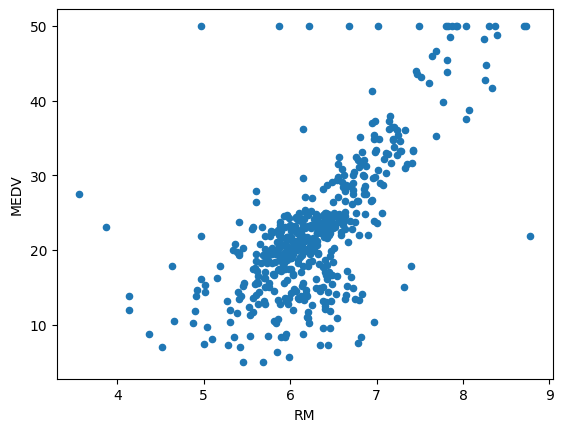

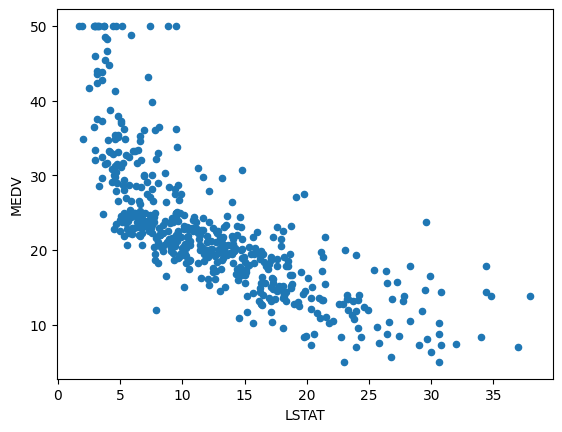

In [4]:
rm_vs_medv = housing_data.plot.scatter(x='RM', y='MEDV')
lstat_vs_medv = housing_data.plot.scatter(x='LSTAT', y='MEDV')


1.3. Calculate the correlation matrix between all features, and plot it as a heatmap (2 points).

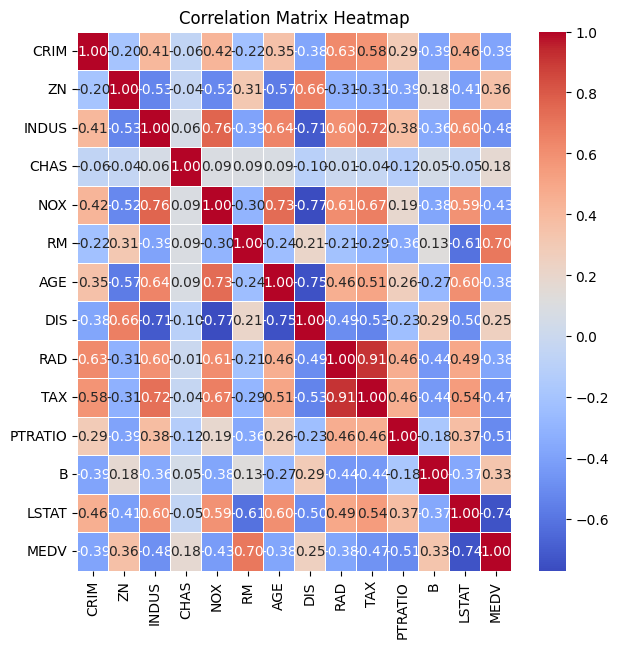

In [5]:
correlation_matrix = housing_data.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2. Linear Regression (20 points)

2.1. Implement a linear regression model using only the 'RM', 'LSTAT' and 'PTRATIO' features to predict 'MEDV'. (3 points)

2.2. Fit the model on the training data and make predictions on the test data. (3 points)

2.3. Calculate and print the Mean Squared Error (MSE) and R-squared score for both training and test sets. (3 points)

2.4. Make a scatterplot comparing the actual 'MEDV' values vs. the predicted 'MEDV' values. (3 points)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = housing_data[['RM', 'LSTAT', 'PTRATIO']]
y = housing_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_test = lin_reg_model.predict(X_test)

ms_error_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

y_pred_train = lin_reg_model.predict(X_train)

ms_error_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


print(f"MSE for test set is {round(ms_error_test, 3)}")
print(f"R2 score for test set is {round(r2_test, 4)}")

print(f"MSE for training set is {round(ms_error_train, 3)}")
print(f"R2 score for training set is {round(r2_train, 4)}")


MSE for test set is 20.826
R2 score for test set is 0.7378
MSE for training set is 28.811
R2 score for training set is 0.6634


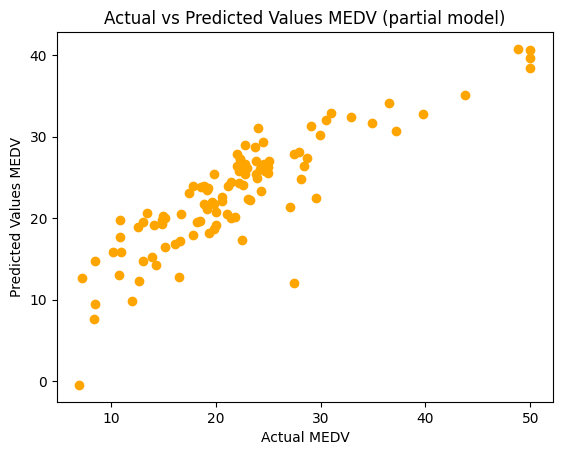

In [8]:
real_medv_vs_pred_medv = plt.scatter(y_test, y_pred_test, color='orange')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted Values MEDV')
plt.title('Actual vs Predicted Values MEDV (partial model)')
plt.show()


2.5.  Implement a linear regression model using all features. (3 points).

2.6.  Make a scatterplot comparing the actual 'MEDV' values vs. the predicted 'MEDV' values. (2 points).

2.7.  Compare its performance with the simple linear regression model using the metrics discussed so far. Which one does better? Print the result. (3 points)

In [9]:
full_lin_reg_model = LinearRegression()

X = housing_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = housing_data['MEDV']

full_X_train, full_X_test, full_y_train, full_y_test = train_test_split(X, y, test_size=0.20)

full_lin_reg_model.fit(full_X_train, full_y_train)

full_y_pred = full_lin_reg_model.predict(full_X_test)

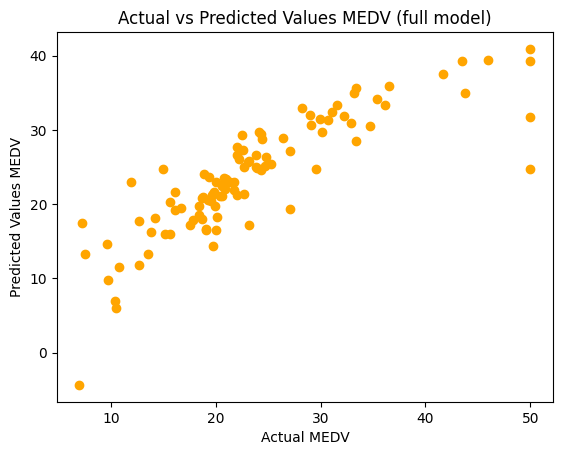

In [10]:
full_real_medv_vs_pred_medv = plt.scatter(full_y_test, full_y_pred, color='orange')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted Values MEDV')
plt.title('Actual vs Predicted Values MEDV (full model)')
plt.show()

In [11]:
full_ms_error_test = mean_squared_error(full_y_test, full_y_pred)
full_r2_test = r2_score(full_y_test, full_y_pred)

print("FULL MODEL RESULTS")
print(f"MSE = {round(full_ms_error_test, 3)}")
print(f"R2 score = {round(full_r2_test, 3)}")
print("--------------")
print("SIMPLE MODEL RESULTS")
print(f"MSE = {round(ms_error_test, 3)}")
print(f"R2 score = {round(r2_test, 3)}")

FULL MODEL RESULTS
MSE = 25.707
R2 score = 0.714
--------------
SIMPLE MODEL RESULTS
MSE = 20.826
R2 score = 0.738


Now that we have implemented the linear regressions with both the "simple" and "full" linear regressions, we can compare the two.  
We can see that the linear regression which predicts MEDV using all features outperforms the regression which uses only 3. The MSE for the full model is around 19.7, which is much lower than the MSE for the simple model at 34.7. Additionally, the r2 value is also closer to one on the full model, which indicated that our predicted values with the full model were closer to the actual MEDV values.  
This result is not surprising. Training the model using more (but still relevant) data gives us a more accurate model.

_______________

## 3. Comparing Linear Regression with Polynomial Regression (15 points)

3.1. Implement a linear regression model and a polynomial regression model with degree 2 (a quadratic equation) using the 'RM' feature to predict 'MEDV'. Do a train-test split, and compare how they perform by printing off their R² values on both the train and test data. (4 points)

3.2.  Create a scatter plot showing the predictions of both linear and polynomial models on the same graph, against the actual data. (3 points)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

X = housing_data[['RM']]
y = housing_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# predicting MEDV with RM feature - LINEAR

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_linear_train = lin_reg_model.predict(X_train)
y_pred_linear_test = lin_reg_model.predict(X_test)

In [14]:
# predicting MEDV with RM feature - QUADRATIC

quad_model = PolynomialFeatures(degree=2)
X_train_poly = quad_model.fit_transform(X_train)
X_test_poly = quad_model.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

y_train_pred_poly = poly_reg_model.predict(X_train_poly)
y_test_pred_poly = poly_reg_model.predict(X_test_poly)

In [15]:
r2_train_lin = r2_score(y_train, y_pred_linear_train)
r2_test_lin = r2_score(y_test, y_pred_linear_test)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print("LINEAR REGRESSION SCORES")
print(f"r2 score for training set = {round(r2_train_lin, 3)}")
print(f"r2 score for test set = {round(r2_test_lin, 3)}")
print("POLYNOMIAL SCORES")
print(f"r2 score for training set = {round(r2_train_poly, 3)}")
print(f"r2 score for test set = {round(r2_test_poly, 3)}")

LINEAR REGRESSION SCORES
r2 score for training set = 0.469
r2 score for test set = 0.545
POLYNOMIAL SCORES
r2 score for training set = 0.531
r2 score for test set = 0.62


c:\eaca\ml-cwork-1\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\eaca\ml-cwork-1\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


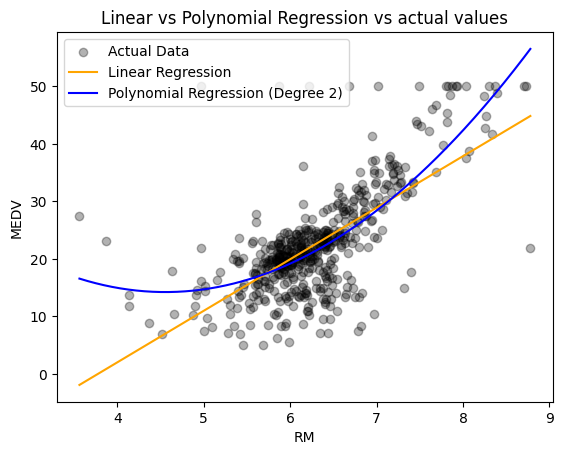

In [16]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

y_range_pred_lin = lin_reg_model.predict(X_range)
X_range_poly = quad_model.transform(X_range)
y_range_pred_poly = poly_reg_model.predict(X_range_poly)

plt.scatter(X, y, color='black', label='Actual Data', alpha=0.3)
plt.plot(X_range, y_range_pred_lin, color='orange', label='Linear Regression')
plt.plot(X_range, y_range_pred_poly, color='blue', label='Polynomial Regression (Degree 2)')


plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear vs Polynomial Regression vs actual values')
plt.legend()

plt.show()


3.3.  Implement polynomial regression with degrees 1, 2, 3, and 4 using the feature `RM`. Make a plot of their  `mean squared error` to compare their performances using cross-validation. (4 points)

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [17]:
from sklearn.model_selection import cross_val_score

X = housing_data[['RM']]
y = housing_data['MEDV']

degrees = [i for i in range(1, 5)]
MSE_by_degree = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    polynomial_model = LinearRegression()

    mse_cv = -cross_val_score(polynomial_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    mse_mean = mse_cv.mean()
    # basically it returned an array of 5 MSEs (cos our cv was 5)
    # each calculated with a different "fold"
    # and we're taking the mean of those 5, as a more accurate MSE
    MSE_by_degree.append(mse_mean)

print(f"MSE by degree")
print("--------")
for degree, MSE in zip(degrees, MSE_by_degree):
    print(f"{degree=}, MSE={round(float(MSE), 2)}")

MSE by degree
--------
degree=1, MSE=52.72
degree=2, MSE=42.86
degree=3, MSE=42.47
degree=4, MSE=45.94


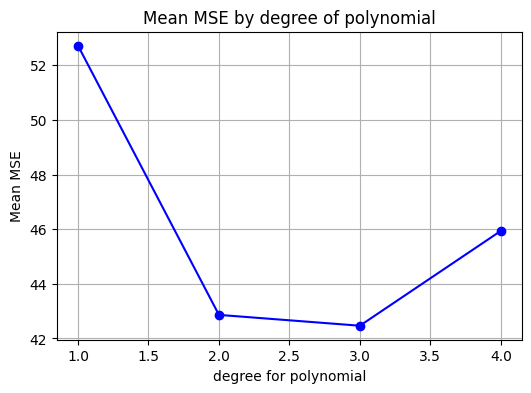

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(degrees, MSE_by_degree, marker='o', linestyle='-', color='b')
plt.xlabel('degree for polynomial')
plt.ylabel('Mean MSE')
plt.title('Mean MSE by degree of polynomial')
plt.grid(True)
plt.show()

**3.4. Discuss the trade-offs between model complexity and performance. Consider concepts such as overfitting, underfitting, and the bias-variance tradeoff. (4 points)**

We can see that at degree 1 (linear regression), the MSE is at 52.72. The MSE then improves at degree 2 (quadratic), going down to 42.86. It improves very slightly when going to degree 3, going down to 42.47, however the change is extremely small. Finally, when we go to degree 4, the MSE worsens, by going up to 45.94.  
From these results, we can conclude the following:
- At degree 1, the model is underfit. The model is not complex enough to fit the data adequately.
- At degree 2, the model seems quite accurate, as is also the case for degree 3.
- However, at degree 4, the model becomes less accurate. We can say that we now have overfitting.  
Therefore it is probably optimal in this case to use a polynomial regression of degree 2 or 3 in this situation.

Regarding the second part of the question:
- bias refers to error due to the model being too 'simple' for the data.
- high bias is the case when underfitting.
- variance refers to error due to the model being overfit
- for instance, we can fit a very high-degree polynomial to the training data, but this will fail when trying to predict unseen values.

Considering these facts, we want a model which has neither high variance nor high bias, in other words a model which is neither under nor over fit.  
As we increase the complexity of the model we use to fit our data (for instance, using higher-degree polynomials), the variance increases and the bias decreases.  
If we can minimise bias __and__ variance, we are using a complexity which is both complex __enough__ to capture the essence of our data, whilst not being __too__ complex, so it can predict unseen values without creating unpredictable results.

## 4. Feature Selection (10 points)

**4.1. Discuss the impact of feature selection on model performance and interpretability. (5 points)**


As a reminder , in the previous sections, we got the following results:  
FULL MODEL RESULTS  
MSE = 13.844  
R2 score = 0.779  
SIMPLE MODEL RESULTS  
MSE = 26.783  
R2 score = 0.707  

In this case, "full model" refers to using all features in the dataset to predict MEDV, while "simple model" refers to when we used 3 select features.  
On this occasion, using all features gave us a more accurate prediction of MEDV, as the mean squared error was 13.8 for the full model, whereas it was much higher for the simple model, at 26.8. Similarly, the r2 value also shows us that the full model was more accurate, as the r2 is closer to 1 in the full model compared to the simple model (0.779 vs 0.707 respectively).  

In general, if we have more features, then our models will be more accurate, as long as the features in question are relevant and correlated with the labels.  
Therefore we need to choose a good balance between the number of features we use and how relevant they are.

______________

# Part B - Classification

## 5. Data Preparation and Exploration (5 points)

5.1	Load the MNIST dataset (`mnist_train.csv` and `mnist_test.csv`) using the pandas library. (1 point)

5.2	Separate features (X) and labels (y) for both train and test data. (1 point)

5.3	Normalize values of the features (X) so they are between 0 and 1. (1 point)

5.4 The input variables (X) should be 784-dimensional vectors. These actually represent 28x28 pixel images[1], but with all pixels represented as individual features. With that in mind, take 5 random data points (i.e. 5 random rows of the dataset), reshape them[2] from 784-dimensional vectors into 28x28 matrices, and display them (2 points).

[1] - https://en.wikipedia.org/wiki/MNIST_database

[2] - https://numpy.org/doc/2.0/reference/generated/numpy.reshape.html

In [19]:
mnist_train = pd.read_csv('mnist_train.csv', header=None)
mnist_test = pd.read_csv('mnist_test.csv', header=None)

mnist_train.head()

X_train = mnist_train.iloc[:, 1:]  # features
y_train = mnist_train.iloc[:, 0] # labels

# ditto:
X_test = mnist_test.iloc[:, 1:]
y_test = mnist_test.iloc[:, 0]

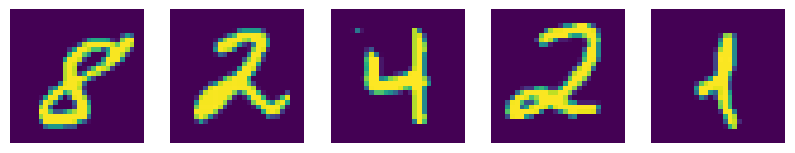

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

import random

random_rows = random.sample(range(1, len(mnist_train)), 5)
matrices = []
for row in random_rows:
    example = X_train.iloc[row].values
    example_matrix = example.reshape(28, 28)
    matrices.append(example_matrix)

fig, axes = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axes[i].axis('off')
    axes[i].imshow(matrices[i])
    for spine in axes[i].spines.values():
        spine.set_visible(False)


## 6. Classification using a Perceptron (15 points)

We will use the Perceptron classifier to distinguish between digit '0' and digit '1'. Use only the subset of the data corresponding to these two digits. 

6.1. 	Train the Perceptron on the training data for this binary classification task. (3 points)

6.2. 	Evaluate the Perceptron on the test set. Print out the test accuracy. (3 points)

6.3. 	Plot the confusion matrix showing how well the classifier performs on the test set for this binary task. (3 points)

6.4. Calculate and print the precision, recall, and F1 score for the Perceptron classifier. (3 points)

In [21]:
# in order to do this, we must first filter our data 
# to only include digits 0 and 1
# then we can train our perceptron
# we will call our filtered dataset bin_...

bin_mnist_train = mnist_train[mnist_train[0].isin([0, 1])]
bin_mnist_test = mnist_test[mnist_test[0].isin([0, 1])]

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

bin_X_train = bin_mnist_train.iloc[:, 1:].values 
bin_y_train = bin_mnist_train.iloc[:, 0].values

bin_X_test = bin_mnist_test.iloc[:, 1:].values 
bin_y_test = bin_mnist_test.iloc[:, 0].values

bin_X_train = bin_X_train / 255.0
bin_X_test = bin_X_test / 255.0

In [23]:
# training
bin_perceptron = Perceptron(max_iter=2000, random_state=42)
bin_perceptron.fit(bin_X_train, bin_y_train)

Perceptron(max_iter=2000, random_state=42)

In [24]:
# testing
bin_y_pred = bin_perceptron.predict(bin_X_test)
bin_accuracy = accuracy_score(bin_y_test, bin_y_pred)
print("Binary Perceptron Classifier")
print(f"accuracy: {bin_accuracy:.5f}")

Binary Perceptron Classifier
accuracy: 0.99953


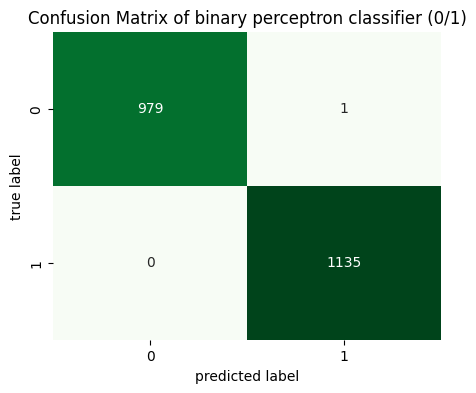

In [25]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(bin_y_test, bin_y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix of binary perceptron classifier (0/1)')
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(bin_y_test, bin_y_pred)
recall = recall_score(bin_y_test, bin_y_pred)
f1 = f1_score(bin_y_test, bin_y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")

Precision: 0.999120
Recall: 1.000000
F1 Score: 0.999560


#### 6.5 Implement a multi-class Perceptron classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [27]:
full_perceptron = Perceptron(max_iter=2000, tol=0.001)
full_perceptron.fit(X_train, y_train)
y_pred = full_perceptron.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("10-DIGIT PERCEPTRON CLASSIFIER\n")
print(f"**Overall accuracy** = {accuracy:.5f}\n")
print(f"Precision = {precision:.8f}")
print(f"Recall = {recall:.8f}")
print(f"F1 Score = {f1:.8f}")

10-DIGIT PERCEPTRON CLASSIFIER

**Overall accuracy** = 0.88050

Precision = 0.88806430
Recall = 0.87843506
F1 Score = 0.87814633


#### 6.6 Plot a confusion matrix for your multi-class classifier. (1 point)

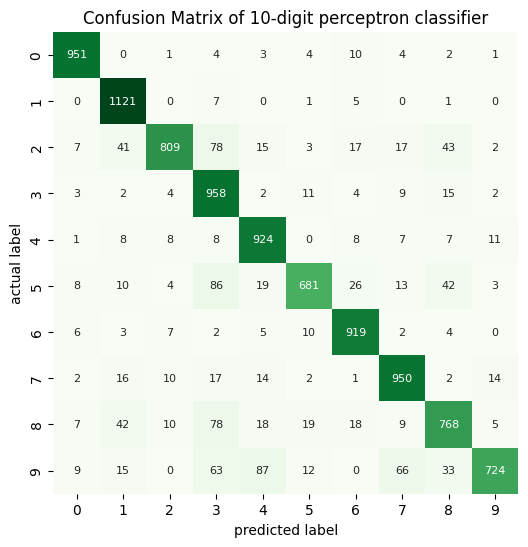

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('Confusion Matrix of 10-digit perceptron classifier')
plt.show()

## 7. Classification with Logistic Regression (15 points)

Now we will implement a Logistic Regression classifier for the same binary classification task as with the perceptron.

7.1. 	Train the Logistic Regression model on the training data for this binary classification task. (3 points)

7.2. 	Evaluate the Logistic Regression model on the test set. Print out the test accuracy. (3 points)

7.3. 	Plot the confusion matrix for the Logistic Regression model on this binary task. (3 points)

7.4. 	Calculate and print the precision, recall, and F1 score for the Logistic Regression classifier (3 points)


In [30]:
from sklearn.linear_model import LogisticRegression

bin_logistic_classifier = LogisticRegression(solver='lbfgs', max_iter=2000)
bin_logistic_classifier.fit(bin_X_train, bin_y_train)

LogisticRegression(max_iter=2000)

In [31]:
bin_y_pred = bin_logistic_classifier.predict(bin_X_test)

accuracy = accuracy_score(bin_y_test, bin_y_pred)
print(f"{accuracy=:.6f}")

accuracy=0.999527


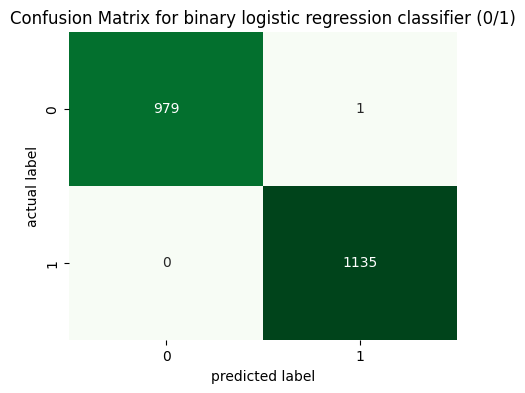

In [32]:
cm = confusion_matrix(bin_y_test, bin_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('Confusion Matrix for binary logistic regression classifier (0/1)')
plt.show()

In [33]:
precision = precision_score(bin_y_test, bin_y_pred)
recall = recall_score(bin_y_test, bin_y_pred)
f1 = f1_score(bin_y_test, bin_y_pred)

print("Binary Logistic Regression Classifier")
print(f"Overall accuracy: {accuracy_score(bin_y_test, bin_y_pred):.5f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")

Binary Logistic Regression Classifier
Overall accuracy: 0.99953
Precision: 0.999120
Recall: 1.000000
F1 Score: 0.999560


#### 	7.5 Implement a multi-class Logistic Regression classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [34]:
full_logistic_classifier = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')
full_logistic_classifier.fit(X_train, y_train)

c:\eaca\ml-cwork-1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [35]:
y_pred = full_logistic_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("10-DIGIT LOGISTIC REGRESSION CLASSIFIER\n")
print(f"**Overall accuracy** = {accuracy:.5f}\n")
print(f"Precision = {precision:.8f}")
print(f"Recall = {recall:.8f}")
print(f"F1 Score = {f1:.8f}")

10-DIGIT LOGISTIC REGRESSION CLASSIFIER

**Overall accuracy** = 0.92600

Precision = 0.92500435
Recall = 0.92492688
F1 Score = 0.92489797


#### 7.6 Plot the confusion matrix for the multi-class Logistic Regression classifier. (1 point)

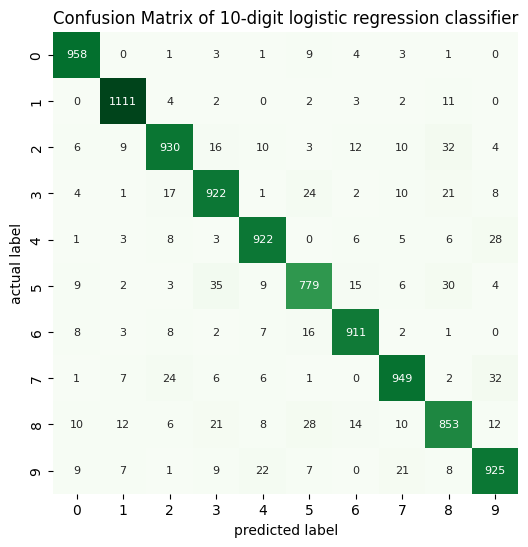

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('Confusion Matrix of 10-digit logistic regression classifier')
plt.show()

## 8. Model Comparison and Analysis (7 points)

8.1. For the multi-class Logistic Regression model, identify the three digits that are most frequently misclassified (i.e. classified wrong). Using the same `numpy.reshape` code as in question 5.4, display example images of these misclassified data points (4 points)

In [37]:
# calculate most commonly misidentified digits

sums_of_rows_except_diagonals = []

for i in range(len(cm)):
    sum = 0
    for j in range(len(cm[0])):
        sum += cm[i][j] if i != j else 0
    sums_of_rows_except_diagonals.append(sum)

misid_digits = [np.int64(i) for i in sums_of_rows_except_diagonals]
arr = np.array(misid_digits)
sorted_indices = np.argsort(arr)
misid_indices = [int(sorted_indices[i]) for i in range(7, 10)]

print(f"The most commonly misidentified digits are the following: {misid_indices}")

The most commonly misidentified digits are the following: [2, 5, 8]


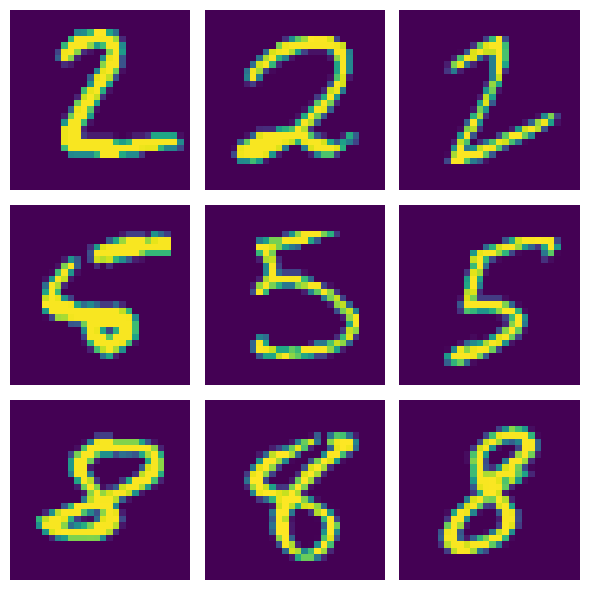

In [38]:
# display examples of those digits

digits = misid_indices
example_matrices = []

for digit in digits:
    misid_digit_mnist_test = mnist_test[mnist_test[0] == digit]

    for i in range(3):
        example = misid_digit_mnist_test.iloc[i, 1:].values
        example_matrix = example.reshape(28, 28)
        example_matrices.append(example_matrix)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
axes = axes.flatten()

for i in range(9):
    axes[i].axis('off')
    axes[i].imshow(example_matrices[i])
    for spine in axes[i].spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

**8.2. Compare the performance of the Perceptron and Logistic Regression models on the binary classification and multi-class tasks. Which performed better? Explain why you think this is the case (3 points)**

**Binary classification:**

- **Perceptron:**
    - Overall accuracy = 0.99953
    - Precision = 0.999120
    - Recall = 1.000000
    - F1 Score = 0.999560

- **Logistic Regression:**
    - Overall accuracy = 0.99953
    - Precision = 0.999120
    - Recall = 1.000000
    - F1 Score = 0.999560

**Full 10-digit classification**

- **Perceptron:**
    - Overall accuracy = 0.88050
    - Precision = 0.88806430
    - Recall = 0.87843506
    - F1 Score = 0.87814633

- **Logistic Regression:**
    - Overall accuracy = 0.92600
    - Precision = 0.92500435
    - Recall = 0.92492688
    - F1 Score = 0.92489797  
    
----------

From the data, we can see that in the binary classification, both the perceptron and the logistic regression classifiers perform excellently. They both have overall accuracies greater than 99.9%. These are effectively near-perfect binary classifiers for distinguishing between digits 0 and 1.  
This result is not particularly surprising. The digits 0 and 1 are quite distinct (where as maybe 1 and 7 might be more difficult to differenciate for example).  
  
As for the multi-class classification, the logistic regression model outperformed the perceptron. The logistic regression (LR) model had an overall accuracy of 92.6%, whereas the accuracy of the perceptron was lower at 88.1%. Therefore, judging simply based on the models' accuracy, the LR model seems to be the more appropriate model for the multi-class classification task.  

The comparison of the precision and recall values of the two models is consistent with this idea. The LR showed a precision value of 0.925, markedly higher than a precision of 0.888 for the perceptron.  

The same goes for the recall values: 0.925 for the LR, compared to 0.878 for the perceptron (which equates to a 5.4% higher recall for the LR when compared to the perceptron).

Judging by all of these metrics, the logistic regression model consistently outperformed the perceptron model at classifying the 10 digits.  

In order to try to explain why, we can consider the fact that a perceptron will struggle when the different classes we are trying to identify are not *linearly* separable (as is the case with the data we are using). When trying to distinguish the hand-drawn digits, the boundaries between classes are often not linear. They often overlap. For instance, the boundary between a 5 and a 3, or a 9 and a 4 is blurry, sometimes even for a human. The linear regression, on the other hand, is better suited for this task as it can find a better decision boundary in this multi-class use case. 

Therefore, both models are suitable for the binary classification task, but the logistic regression model is better suited than the perceptron for the multi-class version.

## 9. Understanding Machine Learning (8 points)

**9.1. How might you modify the input data or feature representation to potentially improve the performance of these models on the MNIST dataset? Suggest at least two specific techniques (4 points).**

In order to potentially improve the performance of these models on the MNIST database, we could attempt different techniques:
- we can make sure the data is consistent:
    - all drawn digits are mostly the same size.
    - brightness values for all digits are mostly the same --> (we do not want all the 4s in the data to be brighter than all the other digits for example, because then the model would be learning to classify those 4s based on brightness, which is not what we're looking for).
    - similarly, if all the 5s for example are drawn closer to the top-right corner of the image, our classifier might be training based on that fact, which is not the desired outcome.
- if there are any specific entries in the database which are not consistent with the rest, we can choose to remove those entries. For example, if there is an 8 in the database that is very poorly drawn, to the point where even a human would have trouble distinguishing it, we should not be training our model on that poorly drawn example.
- we can make sure there are no digits that have been misclassified in the original database.
- we can check that we have an equal number of every digit in the input data.  

By performing these techniques of data cleanup, we can potentially improve the performance of our models.

**9.2. Explain the importance of the train-test split in this context. What might happen if you trained and evaluated the models on the entire dataset without splitting?  (4 points)**

Our goal is *not* to create a classifier which can accurately classify data it has already seen before, but rather a classifier which can correctly classify *new* data, once it has been trained.  
When a model learns the specific details of one dataset, it might be very good at classifying that particular data, but it will fail at classifying new data, which as we said is not the intended outcome. We do not want to train a model to be like *Funes el Memorioso*. We call this situation, where the model is not able to generalise, **overfitting**. When a model is overfit, it has trained itself on the noise in the training data, which is why it is not able to generalise.  
The train/test split helps to prevent ending up in this situation. When we do a train test split, we train the model on a certain section of the dataset (in our case the split was 80% training, 20% testing), and we then test the model which we just trained on the test data. The key here is that the test data was not used in the training of the model, so we can evaluate it on data it has not seen before, helping us to prevent overfitting.  
In order to be extra rigourous, we might choose to do k-fold cross-validation (which we did in one of the questions of this coursework), which does repeated train-test splits with a different split each time, to ensure that we do not get any weird results from the data being inconsistent between the training and test sets.